In [1]:
#!/usr/bin/env python
# coding: utf-8
# Two hidde layer network
# In[1]:


import numpy as np
import tensorflow as tf
import etp as etp
import calculate_virtual_coordinates as cvc
import matplotlib.pyplot as plt

from random import seed
from random import randint

import pickle
seed(23)

C = 5 # maximum number of anchors
H1 = 500 # size of hidden filters
H2 = 500 # size of hidden filters
F = 2 # Final dimension of coordinates
random_seed = 23
radius = 1 # extent of possible communication
MAX_NODES = 1000
learning_rate = 0.7
epochs = 1000
display_cost_period = 200


# In[2]:


def plot_learning(cost_history):
    plt.plot(cost_history)
    plt.xlabel('Number of Graphs')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.show()


# In[3]:


g = tf.Graph()

with g.as_default():
    tf.set_random_seed(random_seed)
    W_0 = tf.Variable(tf.truncated_normal(shape=(C, H1),
                                      mean=0.0,
                                      stddev=0.1,
                                      dtype=tf.float32,
                                      seed=random_seed))
    
    W_1 = tf.Variable(tf.truncated_normal(shape=(H1, H2),
                                  mean=0.0,
                                  stddev=0.1,
                                  dtype=tf.float32,
                                  seed=random_seed))

    W_2 = tf.Variable(tf.truncated_normal(shape=(H2, F),
                                    mean=0.0,
                                    stddev=0.1,
                                    dtype=tf.float32,
                                    seed=random_seed))
    

    input_layer = tf.placeholder(tf.float32, [None, C], # INPUT: num_of_nodes X VC_values
                                 name='input')
    
    physical_coordinates = tf.placeholder(tf.float32, [None, F], # INPUT: num_of_nodes X geographic_coordinates
                                 name='phy_coord')
    
    adj = tf.placeholder(tf.float32, [None, None], # INPUT: num_of_nodes X num_of_nodes
                                 name='adj')
    
    A_caret = tf.placeholder(tf.float32, [None, None], # INPUT: num_of_nodes X num_of_nodes
                                 name='A_caret')

    
    out_1 = tf.matmul(tf.matmul(A_caret, input_layer), W_0)
    out_2 = tf.matmul(tf.matmul(A_caret, out_1), W_1)
    out_3 = tf.matmul(tf.matmul(A_caret, out_2), W_2)
    
    
#     cost = etp.get_best_etp(out_2, physical_coordinates)
#     cost = etp.get_best_etp(out_2, physical_coordinates)
    
    cost = tf.losses.mean_squared_error(out_3, physical_coordinates)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
    
    saver = tf.train.Saver()

    

 


# In[ ]:




Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


calculated all inputs


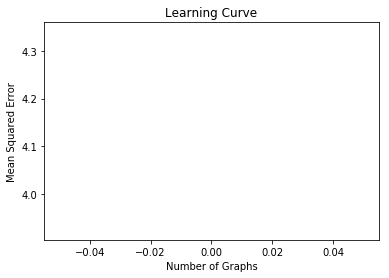

Epoch: 0	 cost: 4.131956577301025	
calculated all inputs
Epoch: 1	 cost: 2629.14892578125	
calculated all inputs
Epoch: 2	 cost: 463.9344177246094	
Model saved in path: model_h_2_g_1000.ckpt


In [2]:
cost_history = []
etp_history = []
with tf.Session(graph=g) as sess:
    # `sess.graph` provides access to the graph used in a `tf.Session`.
    writer = tf.summary.FileWriter("./graphs", sess.graph)

    # Perform your computation...
    for i in range(epochs):
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        
#         phy_coord, inps = cvc.get_VC(randint(10, MAX_NODES))
        phy_coord, inps = cvc.get_VC(randint(10, MAX_NODES))
        adj_matrix = cvc.get_adj(phy_coord)
        A_caret_matrix = cvc.normalize_adj(adj_matrix + np.eye(adj_matrix.shape[0]))
        
        

        curr_cost = sess.run(cost, feed_dict={input_layer: inps,
                                        physical_coordinates: phy_coord,
                                        adj: adj_matrix,
                                        A_caret: A_caret_matrix})
        
#         curr_etp = etp.get_best_etp(curr_out, phy_coord)
#         etp_history.append(curr_etp)

        
        cost_history.append(curr_cost)

#         if not i%display_cost_period:
#             plot_learning(cost_history)

        print('Epoch: {}\t cost: {}\t'.format(i, curr_cost))
        
    save_path = saver.save(sess, "model_h_2_g_1000_alpha_7.ckpt")
    print("Model saved in path: {}".format(save_path))
        
        
        
            

    writer.close()


# In[ ]:


with open('h_2_g_1000_alpha_7_cost_history', 'wb') as fp:
    pickle.dump(cost_history, fp)